In [1]:
import yfinance as yf
import os
import pandas as pd
from datetime import datetime

start_date = "2020-01-01"
end_date = datetime.today()
data_df = yf.download( "FB", start=start_date, end=end_date)[['Open', 'Close', 'Low', 'High', 'Volume']]
data_df.reset_index(inplace=True)
data_df = data_df.rename(columns={"Open": "Stock_Open", "Close": "Stock_Close", "Low": "Stock_Low","High": "Stock_High","Volume": "Stock_Volume"})

[*********************100%***********************]  1 of 1 completed


### Simple Moving Average

A simple moving average (SMA) calculates the average of a selected range of closing prices, by the number of periods in that range.

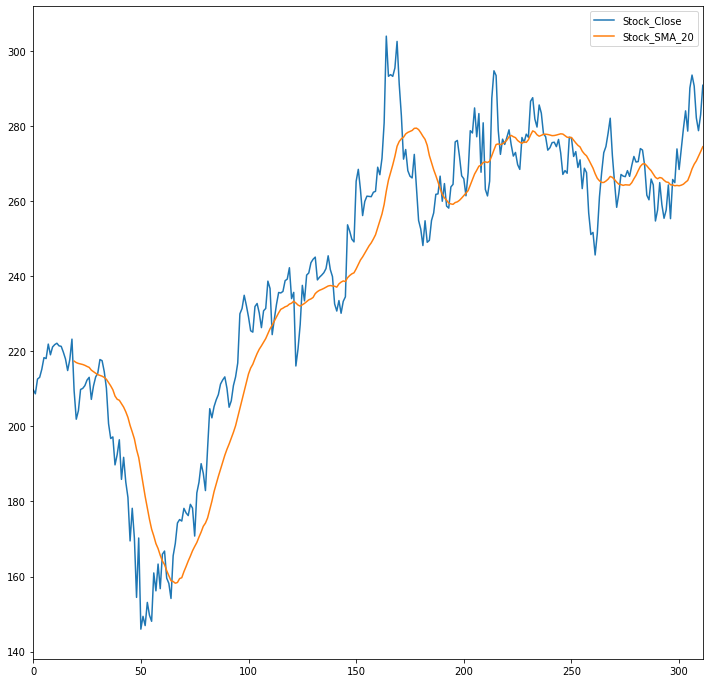

In [5]:
import talib as ta
import matplotlib.pyplot as plt

data_df['Stock_SMA_20'] = ta.SMA(data_df['Stock_Close'],20)
data_df[['Stock_Close','Stock_SMA_20']].plot(figsize=(12,12))
plt.show()

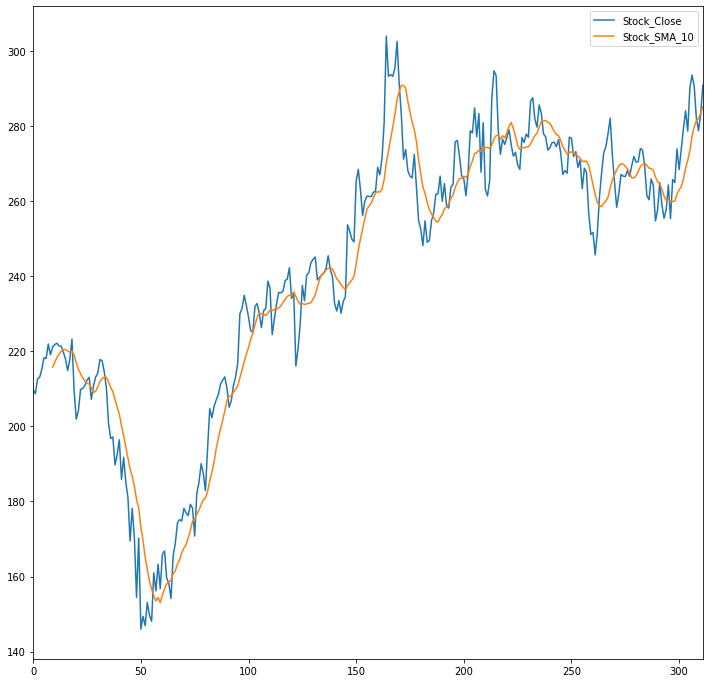

In [3]:
data_df['Stock_SMA_10'] = ta.SMA(data_df['Stock_Close'],10)
data_df[['Stock_Close','Stock_SMA_10']].plot(figsize=(12,12))
plt.show()

### Exponential Moving Averag

An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. That is it is generally known as Exponentially Weighted Moving Average.

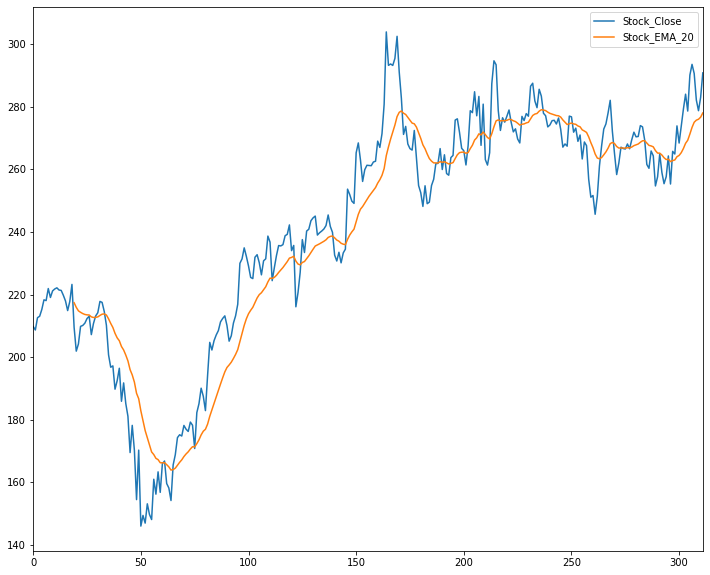

In [4]:
data_df['Stock_EMA_20'] = ta.EMA(data_df['Stock_Close'], timeperiod = 20)
data_df[['Stock_Close','Stock_EMA_20']].plot(figsize=(12,10))
plt.show()

### Average Directional Movement Index(Momentum Indicator)

ADX can be used to help measure the overall strength of a trend. The ADX indicator is an average of expanding price range values.

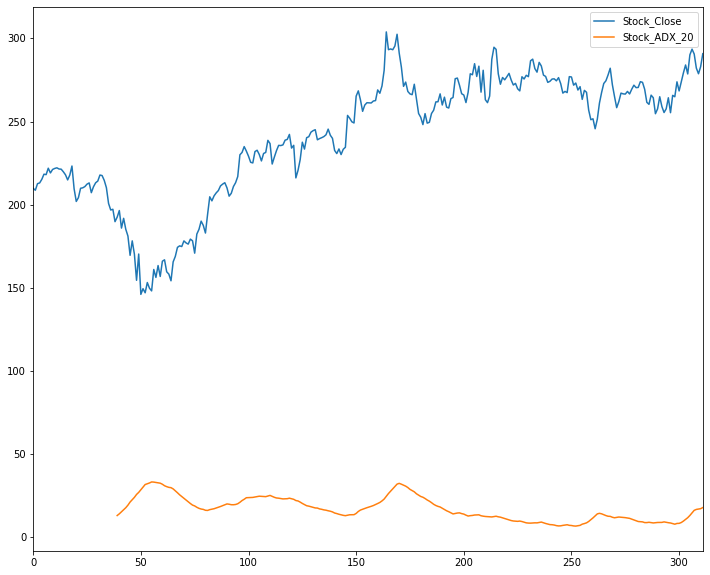

In [7]:
data_df['Stock_ADX_20'] = ta.ADX(data_df['Stock_High'],data_df['Stock_Low'], data_df['Stock_Close'], timeperiod=20)
data_df[['Stock_Close','Stock_ADX_20']].plot(figsize=(12,10))
plt.show()

###  Bollinger Bands

Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by John Bollinger.

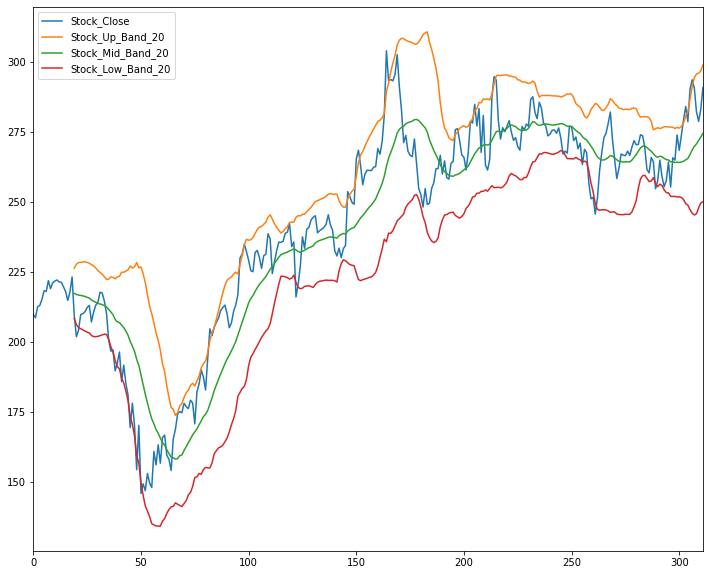

In [8]:
data_df['Stock_Up_Band_20'], data_df['Stock_Mid_Band_20'], data_df['Stock_Low_Band_20'] = ta.BBANDS(data_df['Stock_Close'], timeperiod =20)
data_df[['Stock_Close','Stock_Up_Band_20','Stock_Mid_Band_20','Stock_Low_Band_20']].plot(figsize= (12,10))
plt.show()

### Relative Strength Index(RSI)

The relative strength index is a technical indicator used in the analysis of financial markets. It is intended to chart the current and historical strength or weakness of a stock or market based on the closing prices of a recent trading period.

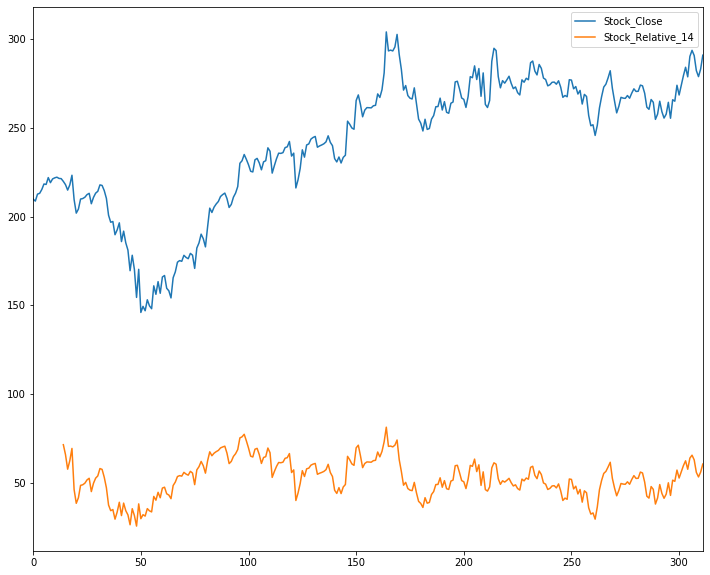

In [9]:
data_df['Stock_Relative_14'] = ta.RSI(data_df['Stock_Close'],14)
data_df[['Stock_Close','Stock_Relative_14']].plot(figsize=(12,10))
plt.show()

In [11]:
data_df.tail()

,Date,Stock_Open,Stock_Close,Stock_Low,Stock_High,Stock_Volume,Stock_SMA_20,Stock_SMA_10,Stock_EMA_20,Stock_ADX_20,Stock_Up_Band_20,Stock_Mid_Band_20,Stock_Low_Band_20,Stock_Relative_14
307,2021-03-23,293.149994,290.630005,289.809998,298.000000,23000900,269.801500,279.712000,275.038656,16.069846,294.284093,269.801500,245.318907,63.032107
308,2021-03-24,291.000000,282.140015,281.160004,291.720001,18675000,270.693001,281.436002,275.714975,16.628632,295.605543,270.693001,245.780459,55.993752
309,2021-03-25,280.980011,278.739990,277.750000,288.059998,24505600,271.895500,281.922000,276.003072,16.858965,295.907629,271.895500,247.883371,53.421096
310,2021-03-26,278.299988,283.019989,277.769989,284.500000,17620600,273.165500,283.384000,276.671350,17.077781,296.705330,273.165500,249.625670,56.152188
311,2021-03-29,285.769989,290.820007,284.700012,293.179993,21695200,274.461000,285.091000,278.018841,17.748631,298.876487,274.461000,250.045513,60.677279
